In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
states = pd.read_csv("./data/state_abriv.csv", index_col=[0])
states

,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Canal Zone,C.Z.,CZ
6,Colorado,Colo.,CO
7,Connecticut,Conn.,CT
8,Delaware,Del.,DE
9,District of Columbia,D.C.,DC


In [3]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead

dfs.keys()

dict_keys(['CA_by_county', 'CDC_Cases_and_deaths', 'complete_vaccine_rate', 'countries-aggregated', 'DECENNIALPL2020', 'key-countries-pivoted', 'reference', 'state_abriv', 'state_neighbors', 'time-series-19-covid-combined', 'Total_States', 'us_confirmed', 'us_county_population_data', 'us_deaths', 'us_simplified', 'vaccine_rate_by_county', 'worldwide-aggregate'])

In [4]:
us_confirmed = dfs["us_confirmed"].copy()
us_confirmed

,Admin2,Date,Case,Country/Region,Province/State
index,,,,,
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming


In [5]:
us_confirmed.groupby('Province/State').mean()

,Case
Province/State,
Alabama,5601.021828
Alaska,1614.808508
American Samoa,1.076398
Arizona,34735.488564
Arkansas,3154.769972
California,41827.999136
Colorado,5373.691161
Connecticut,21567.333288
Delaware,14077.332333


In [6]:
# We can look at this data without having to do the summation for each state by day if we get the simplified version of the data
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date no county data
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [7]:
for n in dfs:
    print(n,'\n',dfs[n],'\n')

CA_by_county 
                        Total Cases Total Deaths  2022 Population  \
Alameda County            44597298       558125        1685048.0   
Alpine County                39462            0           1249.0   
Amador County              1790025        22174          40793.0   
Butte County               7457633        94263         185727.0   
Calaveras County           1182736        24947          46526.0   
Colusa County              1101249         6875          21934.0   
Contra Costa County       35420267       364801        1162547.0   
Del Norte County            894503         7493          28028.0   
El Dorado County           5506841        47678         199134.0   
Fresno County             53944857       751903        1020554.0   
Glenn County               1468002         9407          29671.0   
Humboldt County            2549696        26078         133500.0   
Imperial County           15417931       327983         180291.0   
Inyo County                 71416

In [8]:
dfs['reference']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


I have the longitude and latitude of all of the countries and counties in every country?

In [9]:
reference=dfs['reference']

In [10]:
reference[reference['Admin2']=='San Francisco']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1296,84006075,US,USA,840.0,6075.0,San Francisco,California,US,37.752151,-122.438567,"San Francisco, California, US",881549.0


In [11]:
county_boundries=pd.read_csv('./data/boarders/us-county-boundaries.csv', sep=';')

In [12]:
San_Francisco=county_boundries[county_boundries['NAMELSAD']=='San Francisco County']
San_Francisco

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
1188,"37.7597150131,-122.693975573","{""coordinates"": [[[[-122.612285, 37.815224], [...",6,75,277302,6075,San Francisco,San Francisco County,CA,6,...,488.0,41860.0,41884.0,C,121477743,479114582,37.727239,-123.032229,California,75


Lon and Lat look the same.  the only benifit I get from this data is the "Geo Shape"

Okay.  There are two things in this.  "Coordinates" and "type"

In [13]:
reference[reference['Admin2']=='Alameda']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1259,84006001,US,USA,840.0,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",1671329.0


In [14]:
Ca_by_county=dfs["CA_by_county"]
Ca_by_county.head(1)

,Total Cases,Total Deaths,2022 Population,Growth Since 2010,Density (mi²),Cases per 1K pop,Deaths per 1K pop,Cases by Density (mi²)
Alameda County,44597298,558125,1685048.0,11.37%,2279.89,0.026466,0.000331,19561.162161


Looks like the reference population is a little behind it's from 2018 data.

In [15]:
# Unaassigned data is the same Admin2 name in each state.  I need to rename that data
simplified['Combined_Key']=simplified['Admin2'] + ', ' + simplified['Province/State'] + ', ' + simplified['Country/Region']

In [16]:
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


In [17]:
# Lets import the longitude and latitude data from reference into our predictive algorithm so we can have some geopositional data
Total_simplified=simplified.groupby('Combined_Key').sum()
Total_simplified

,Confirmed,Deaths
Combined_Key,,
"Abbeville, South Carolina, US",1269897,18754
"Acadia, Louisiana, US",3756298,101420
"Accomack, Virginia, US",1547387,24832
"Ada, Idaho, US",27014209,251089
"Adair, Iowa, US",400574,13319
...,...,...
"Yuma, Arizona, US",17806522,390815
"Yuma, Colorado, US",429753,7059
"Zapata, Texas, US",904772,15011


In [18]:
# for some reason there was a tab or some other non visible character in the Combined_Key column so I had to redo it.
reference['Combined_Key']= reference['Admin2'] + ', ' + reference['Province_State'] + ', ' + reference['Country_Region']

In [19]:
County_Locations=reference[['Combined_Key','Lat','Long_']].groupby('Combined_Key').sum()
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
"Ada, Idaho, US",43.452658,-116.241552
"Adair, Iowa, US",41.330756,-94.471059
...,...,...
"Yuma, Arizona, US",32.768957,-113.906667
"Yuma, Colorado, US",40.003468,-102.425867
"Zapata, Texas, US",27.001564,-99.169872


In [20]:
US_Counties=pd.merge(Total_simplified, County_Locations, left_index=True, right_index=True, how='left')
US_Counties

,Confirmed,Deaths,Lat,Long_
Combined_Key,,,,
"Abbeville, South Carolina, US",1269897,18754,34.223334,-82.461707
"Acadia, Louisiana, US",3756298,101420,30.295065,-92.414197
"Accomack, Virginia, US",1547387,24832,37.767072,-75.632346
"Ada, Idaho, US",27014209,251089,43.452658,-116.241552
"Adair, Iowa, US",400574,13319,41.330756,-94.471059
...,...,...,...,...
"Yuma, Arizona, US",17806522,390815,32.768957,-113.906667
"Yuma, Colorado, US",429753,7059,40.003468,-102.425867
"Zapata, Texas, US",904772,15011,27.001564,-99.169872


In [21]:
# Data from 2020 US Census from data.census.gov
us_county_population_data=pd.read_csv('./data/DECENNIALPL2020.csv')
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,0,2,2,0,0,0,0,0,0,0
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,0
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,0,2,2,0,0,0,0,0,0,0
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,0,7,0,7,0,0,0,0,0,0
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,0
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,0
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,0


Looks like row 0 is the meta data for this.  Also this data doens't have the US key added to the end.

In [22]:
us_county_population_data['Combined_Key']=us_county_population_data['NAME']+ ', US'
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,Combined_Key
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,"Geographic Area Name, US"
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,2,2,0,0,0,0,0,0,0,"Autauga County, Alabama, US"
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,"Baldwin County, Alabama, US"
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,2,2,0,0,0,0,0,0,0,"Barbour County, Alabama, US"
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,"Bibb County, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,7,0,7,0,0,0,0,0,0,"Vega Baja Municipio, Puerto Rico, US"
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,"Vieques Municipio, Puerto Rico, US"
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,"Villalba Municipio, Puerto Rico, US"
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,"Yabucoa Municipio, Puerto Rico, US"


In [23]:
us_county_population_data.drop(0, inplace=True)

In [24]:
us_county_population_data.rename(columns={'P1_001N':'Total_Pop'}, inplace=True)

In [25]:
County_Pop=us_county_population_data[['Combined_Key','Total_Pop']]
County_Pop

,Combined_Key,Total_Pop
1,"Autauga County, Alabama, US",58805
2,"Baldwin County, Alabama, US",231767
3,"Barbour County, Alabama, US",25223
4,"Bibb County, Alabama, US",22293
5,"Blount County, Alabama, US",59134
...,...,...
3217,"Vega Baja Municipio, Puerto Rico, US",54414
3218,"Vieques Municipio, Puerto Rico, US",8249
3219,"Villalba Municipio, Puerto Rico, US",22093
3220,"Yabucoa Municipio, Puerto Rico, US",30426


In [26]:
County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19356\115391863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)


In [27]:
County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19356\328253180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)


In [28]:
County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19356\3673278707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)


In [29]:
County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19356\2293417644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)


In [30]:
County_Pop.set_index('Combined_Key', inplace=True)

Apparently Louisiana has perishes instead of counties and Alaska has bouroughs where RI and CT don't have anything

In [31]:
Total_US_Counties=pd.merge(US_Counties, County_Pop, left_index=True, right_index=True, how='left')

In [32]:
Total_US_Counties

,Confirmed,Deaths,Lat,Long_,Total_Pop
Combined_Key,,,,,
"Abbeville, South Carolina, US",1269897,18754,34.223334,-82.461707,24295
"Acadia, Louisiana, US",3756298,101420,30.295065,-92.414197,57576
"Accomack, Virginia, US",1547387,24832,37.767072,-75.632346,33413
"Ada, Idaho, US",27014209,251089,43.452658,-116.241552,494967
"Adair, Iowa, US",400574,13319,41.330756,-94.471059,7496
...,...,...,...,...,...
"Yuma, Arizona, US",17806522,390815,32.768957,-113.906667,203881
"Yuma, Colorado, US",429753,7059,40.003468,-102.425867,9988
"Zapata, Texas, US",904772,15011,27.001564,-99.169872,13889


In [33]:
Total_US_Counties.isna().sum()

Confirmed      0
Deaths         0
Lat            1
Long_          1
Total_Pop    190
dtype: int64

In [34]:
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()]

,Confirmed,Deaths,Lat,Long_,Total_Pop
Combined_Key,,,,,
"Aleutians West, Alaska, US",307219,350,52.323300,-174.159600,NaN
"Alexandria, Virginia, US",5865837,68285,38.814003,-77.081831,NaN
"Anasco, Puerto Rico, US",415971,0,18.287985,-67.120611,NaN
"Anchorage, Alaska, US",16962552,100039,61.149982,-149.142699,NaN
"Baltimore City, Maryland, US",24788650,560331,39.302119,-76.611510,NaN
...,...,...,...,...,...
"Williamsburg, Virginia, US",374776,6375,37.281313,-76.709051,NaN
"Winchester, Virginia, US",1360734,18415,39.170545,-78.173251,NaN
"Wrangell, Alaska, US",43618,56,56.320200,-132.058373,NaN


In [35]:
Total_US_Counties=Total_US_Counties.reset_index()

In [36]:
Admin2 =Total_US_Counties['Combined_Key'].str.split(',')

In [37]:
Admin2

0       [Abbeville,  South Carolina,  US]
1               [Acadia,  Louisiana,  US]
2              [Accomack,  Virginia,  US]
3                      [Ada,  Idaho,  US]
4                     [Adair,  Iowa,  US]
                      ...                
3331                [Yuma,  Arizona,  US]
3332               [Yuma,  Colorado,  US]
3333                [Zapata,  Texas,  US]
3334                [Zavala,  Texas,  US]
3335        [Ziebach,  South Dakota,  US]
Name: Combined_Key, Length: 3336, dtype: object

In [38]:
Total_US_Counties['Combined_Key']=Admin2

In [39]:
Total_US_Counties

,Combined_Key,Confirmed,Deaths,Lat,Long_,Total_Pop
0,"[Abbeville, South Carolina, US]",1269897,18754,34.223334,-82.461707,24295
1,"[Acadia, Louisiana, US]",3756298,101420,30.295065,-92.414197,57576
2,"[Accomack, Virginia, US]",1547387,24832,37.767072,-75.632346,33413
3,"[Ada, Idaho, US]",27014209,251089,43.452658,-116.241552,494967
4,"[Adair, Iowa, US]",400574,13319,41.330756,-94.471059,7496
...,...,...,...,...,...,...
3331,"[Yuma, Arizona, US]",17806522,390815,32.768957,-113.906667,203881
3332,"[Yuma, Colorado, US]",429753,7059,40.003468,-102.425867,9988
3333,"[Zapata, Texas, US]",904772,15011,27.001564,-99.169872,13889
3334,"[Zavala, Texas, US]",930381,19751,28.866172,-99.760508,9670


In [48]:
admin2=[]
state2=[]
country2=[]
for n in Total_US_Counties['Combined_Key']:
    admin2.append(n[0])
    state2.append(n[1])
    country2.append(n[2])

In [49]:
Total_US_Counties['Admin2']=admin2
Total_US_Counties['Province/State']=state2

In [56]:
Total_US_Counties.drop('Combined_Key', axis=1, inplace=True)

In [57]:
Total_US_Counties.groupby(['Province/State','Admin2']).sum()

Confirmed  Deaths        Lat       Long_
Province/State Admin2                                              
 Alabama       Autauga       3523337   51099  32.539527  -86.644082
               Baldwin      11905296  162479  30.727750  -87.722071
               Barbour       1261086   26271  31.868263  -85.387129
               Bibb          1410004   30164  32.996421  -87.125115
               Blount        3484256   60955  33.982109  -86.567906
...                              ...     ...        ...         ...
 Wyoming       Teton         1830091    4316  43.935225 -110.589080
               Uinta         1202016    7429  41.287818 -110.547578
               Unassigned        420    2683   0.000000    0.000000
               Washakie       502625   12028  43.904516 -107.680187
               Weston         342738    2932  43.839612 -104.567488

[3336 rows x 4 columns]

In [60]:
Total_US_Counties.dtypes

Confirmed           int64
Deaths              int64
Lat               float64
Long_             float64
Total_Pop          object
Admin2             object
Province/State     object
dtype: object

In [65]:
Total_US_Counties[Total_US_Counties['Lat'].isna()]

,Confirmed,Deaths,Lat,Long_,Total_Pop,Admin2,Province/State
3309,60109,786,NaN,NaN,NaN,Yakutat,Alaska


Yakutat Alaska is located at 59.5469° N, 139.7272° W

In [66]:
Total_US_Counties['Lat'].fillna(59.5469, inplace=True)
Total_US_Counties['Long_'].fillna(-139.7272, inplace=True)

In [68]:
Total_US_Counties.isna().sum()

Confirmed           0
Deaths              0
Lat                 0
Long_               0
Total_Pop         190
Admin2              0
Province/State      0
dtype: int64

In [69]:
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()]

,Confirmed,Deaths,Lat,Long_,Total_Pop,Admin2,Province/State
38,307219,350,52.323300,-174.159600,NaN,Aleutians West,Alaska
41,5865837,68285,38.814003,-77.081831,NaN,Alexandria,Virginia
63,415971,0,18.287985,-67.120611,NaN,Anasco,Puerto Rico
64,16962552,100039,61.149982,-149.142699,NaN,Anchorage,Alaska
130,24788650,560331,39.302119,-76.611510,NaN,Baltimore City,Maryland
...,...,...,...,...,...,...,...
3255,374776,6375,37.281313,-76.709051,NaN,Williamsburg,Virginia
3263,1360734,18415,39.170545,-78.173251,NaN,Winchester,Virginia
3296,43618,56,56.320200,-132.058373,NaN,Wrangell,Alaska
3309,60109,786,59.546900,-139.727200,NaN,Yakutat,Alaska


These counties must have populations.  I should probably set them to the mean population for that state.

In [77]:
Total_US_Counties.groupby('Province/State').mean()

,Confirmed,Deaths,Lat,Long_
Province/State,,,,
Alabama,4.228103e+06,78124.373134,32.884280,-86.710122
Alaska,1.319949e+06,6609.500000,60.911422,-148.562018
Arizona,2.885591e+07,547409.933333,33.675904,-111.463232
Arkansas,2.346938e+06,38248.200000,34.911889,-92.433978
California,3.171466e+07,468089.327586,37.843962,-120.728594
Colorado,4.061326e+06,52240.625000,38.935474,-105.486240
Connecticut,1.968933e+07,539014.500000,41.613680,-72.656830
Delaware,1.714486e+07,283014.000000,39.109277,-75.533237
District of Columbia,2.526813e+07,578316.000000,38.904178,-77.016560


In [88]:
Total_US_Counties['Total_Pop']=Total_US_Counties['Total_Pop'].astype('float64')

In [89]:
Total_US_Counties.dtypes

Confirmed           int64
Deaths              int64
Lat               float64
Long_             float64
Total_Pop         float64
Admin2             object
Province/State     object
dtype: object

In [96]:
Total_US_Counties.isna().sum()

Confirmed           0
Deaths              0
Lat                 0
Long_               0
Total_Pop         190
Admin2              0
Province/State      0
dtype: int64

In [93]:
df=Total_US_Counties.copy()
df

,Confirmed,Deaths,Lat,Long_,Total_Pop,Admin2,Province/State
0,1269897,18754,34.223334,-82.461707,24295.0,Abbeville,South Carolina
1,3756298,101420,30.295065,-92.414197,57576.0,Acadia,Louisiana
2,1547387,24832,37.767072,-75.632346,33413.0,Accomack,Virginia
3,27014209,251089,43.452658,-116.241552,494967.0,Ada,Idaho
4,400574,13319,41.330756,-94.471059,7496.0,Adair,Iowa
...,...,...,...,...,...,...,...
3331,17806522,390815,32.768957,-113.906667,203881.0,Yuma,Arizona
3332,429753,7059,40.003468,-102.425867,9988.0,Yuma,Colorado
3333,904772,15011,27.001564,-99.169872,13889.0,Zapata,Texas
3334,930381,19751,28.866172,-99.760508,9670.0,Zavala,Texas


In [94]:
df["Total_Pop"] = df.groupby("Province/State")["Total_Pop"].transform(lambda x: x.fillna(x.mean()))

In [95]:
df.isna().sum()

Confirmed         0
Deaths            0
Lat               0
Long_             0
Total_Pop         0
Admin2            0
Province/State    0
dtype: int64

In [98]:
df.groupby('Province/State').sum()

,Confirmed,Deaths,Lat,Long_,Total_Pop
Province/State,,,,,
Alabama,283282881,5239645,2203.246784,-5809.578199,5.174257e+06
Alaska,39060603,206366,1868.388945,-4605.227866,8.766148e+05
Arizona,432838923,8211786,505.138555,-1671.948482,8.105036e+06
Arkansas,178058372,2868740,2618.391704,-6932.548370,3.091831e+06
California,1839595402,27149306,2194.949775,-7002.258461,4.090161e+07
Colorado,259968431,3343591,2491.870366,-6751.119357,5.954143e+06
Connecticut,158088553,4314072,332.909441,-581.254637,4.507430e+06
Delaware,51593423,849197,117.327830,-226.599712,1.649913e+06
District of Columbia,25268132,578316,38.904178,-77.016560,2.068635e+06


Oops! Notice how the longitude and latitude are summations now?  That won't do.  They need to be averages at the very least to assess the average location of the longitude and latitude.

In [139]:
df.to_csv('./data/us_simplified_with_county_data.csv')

## Prediction by county

In [99]:
from sklearn.model_selection import train_test_split 
X=df.drop('Deaths',axis=1).reset_index()
y=df.reset_index().Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2502, 7) (834, 7)
(2502,) (834,)


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3=df.copy()
cat_columns = df.select_dtypes(['object']).columns
for n in cat_columns:
    le.fit(df3[n])
    df3[n]=le.transform(df3[n])

In [122]:
X=df3.drop('Deaths',axis=1)
y=df3.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2502, 6) (834, 6)
(2502,) (834,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


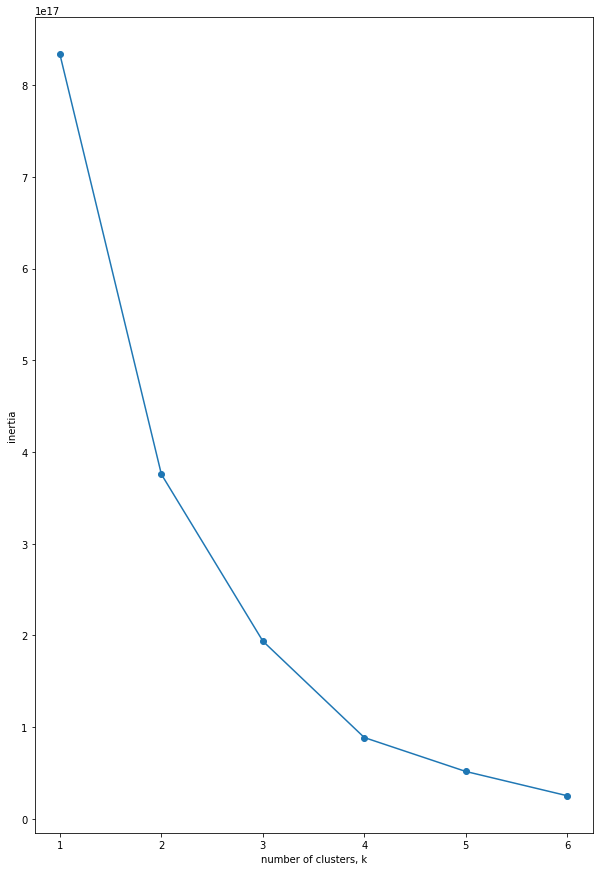

In [123]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [162]:
 # Create a KMeans instance with k clusters: model
model =KMeans(n_clusters=2)

# Fit model to samples
model.fit(X_train)
model.score(X_test)

-6.633289538223155e+17

In [163]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [164]:
model.predict(X_train)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [165]:
knn=X_train.copy()
knn['group']=model.predict(X_train)

In [166]:
knn.sort_index(inplace=True)

In [176]:
knn['Deaths']=y_train
knn

,Confirmed,Lat,Long_,Total_Pop,group,Deaths
Province/State,,,,,,
Alabama,283282881,31.931113,-84.196785,5.174257e+06,0,5239645
Alaska,39060603,56.617847,-139.552360,8.766148e+05,0,206366
Arizona,432838923,29.714033,-98.349911,8.105036e+06,0,8211786
California,1839595402,36.582496,-116.704308,4.090161e+07,1,27149306
Connecticut,158088553,33.290944,-58.125464,4.507430e+06,0,4314072
Delaware,51593423,23.465566,-45.319942,1.649913e+06,0,849197
Florida,1229501228,28.101892,-80.303621,2.218112e+07,1,19411502
Georgia,569298366,32.400973,-82.539201,1.084665e+07,0,10187037
Hawaii,24421302,15.020202,-112.373740,2.037379e+06,0,276712


<AxesSubplot:xlabel='Confirmed', ylabel='Total_Pop'>

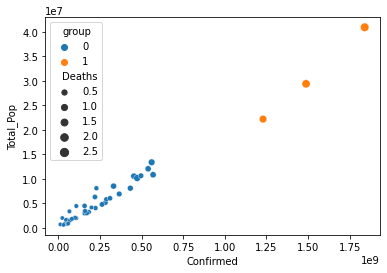

In [177]:
sns.scatterplot(x='Confirmed',y='Total_Pop', data=knn, hue='group', size='Deaths')

<AxesSubplot:xlabel='Long_', ylabel='Lat'>

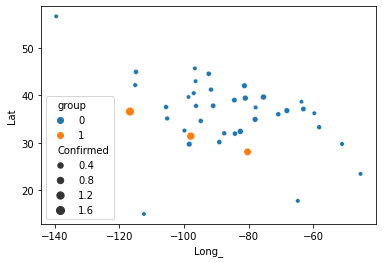

In [179]:
sns.scatterplot(x='Long_',y='Lat', data=knn, hue='group', size='Confirmed')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [125]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [126]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.840051,139439.587921
1,0.909678,0.832850,142543.760975
2,0.838767,0.788562,160319.837172
3,0.792263,0.755911,172253.964789
4,0.759724,0.724459,183015.618633
5,0.727503,0.717722,185239.571398
6,0.718381,0.744570,176210.291769
7,0.726355,0.735937,179163.322960
8,0.711738,0.730726,180922.597524
9,0.700739,0.718665,184929.895415


In [127]:
import seaborn as sns

The score is  0.8328501916546648


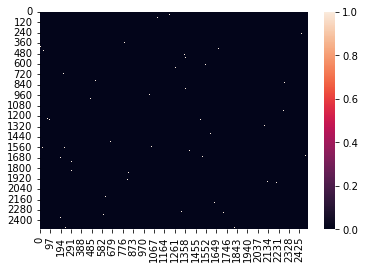

In [128]:
knn = KNeighborsRegressor(2)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


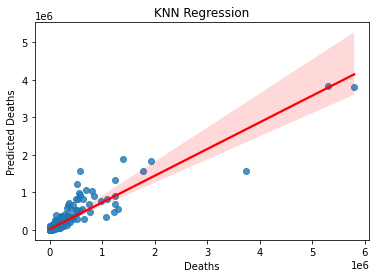

In [129]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

## Prediction by state

In [185]:
mean=df.groupby('Province/State').mean()
df2=df.groupby('Province/State').sum()
df2['Lat']=mean['Lat']
df2['Long_']=mean['Long_']
df2

,Confirmed,Deaths,Lat,Long_,Total_Pop
Province/State,,,,,
Alabama,283282881,5239645,NaN,NaN,5.174257e+06
Alaska,39060603,206366,NaN,NaN,8.766148e+05
Arizona,432838923,8211786,NaN,NaN,8.105036e+06
Arkansas,178058372,2868740,NaN,NaN,3.091831e+06
California,1839595402,27149306,NaN,NaN,4.090161e+07
Colorado,259968431,3343591,NaN,NaN,5.954143e+06
Connecticut,158088553,4314072,NaN,NaN,4.507430e+06
Delaware,51593423,849197,NaN,NaN,1.649913e+06
District of Columbia,25268132,578316,NaN,NaN,2.068635e+06


In [183]:


X=df2.drop('Deaths',axis=1)
y=df2.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(39, 4) (13, 4)
(39,) (13,)


In [184]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The score is  0.7129701863025031


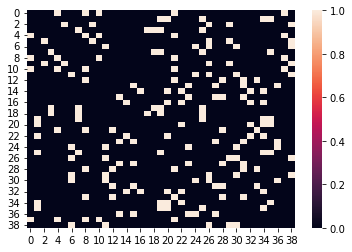

In [137]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


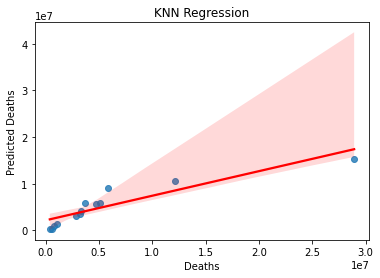

In [138]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

It's almost like there are two things happening here.  One for the data with large numbers of deaths and the other for small numbers